## Covid-19 Analysis

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set()

raw_data = pd.read_csv("Data.csv")
df = raw_data.copy()
df.head(10)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
5,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-01,3.0,NaN,NaN
6,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-02,2.0,NaN,NaN
7,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-03,5.0,NaN,NaN
8,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-04,6.0,NaN,NaN
9,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-05,8.0,NaN,NaN


In [84]:
df.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

In [85]:
df = df.fillna(0)
df.isnull().sum()

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        0
Cases                              0
Deaths                             0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [87]:
df['Daily tests'] = df['Daily tests'].astype('int64')
df['Cases'] = df['Cases'].astype('int64')
df['Deaths'] = df['Deaths'].astype('int64')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Entity                           38472 non-null  object        
 1   Continent                        38472 non-null  object        
 2   Latitude                         38472 non-null  float64       
 3   Longitude                        38472 non-null  float64       
 4   Average temperature per year     38472 non-null  int64         
 5   Hospital beds per 1000 people    38472 non-null  float64       
 6   Medical doctors per 1000 people  38472 non-null  float64       
 7   GDP/Capita                       38472 non-null  float64       
 8   Population                       38472 non-null  int64         
 9   Median age                       38472 non-null  int64         
 10  Population aged 65 and over (%)  38472 non-null  int64    

## Plot 1: Heatmap

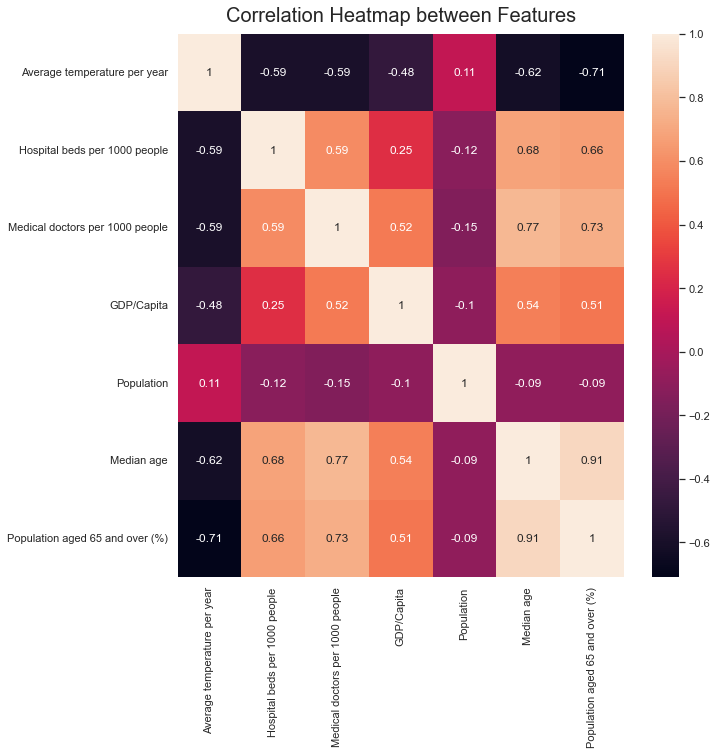

In [88]:
col_drop = ['Entity','Continent','Latitude','Longitude','Date','Daily tests','Cases','Deaths']
df_heatmap = df.copy()
df_heatmap = df_heatmap.drop(col_drop, axis=1)

plt.figure(figsize=(10,10))
plt.title("Correlation Heatmap between Features", fontsize=20, pad=12)
plt.xlabel('xlabel',fontsize=15)
plt.ylabel('ylabel',fontsize=15)
heat_map = sns.heatmap(df_heatmap.corr().round(2), annot=True)

## Plot 2: Total Cases/Deaths worldwide vs Time

In [89]:
df1 = df.copy()
cases_vs_time = (df1
                .filter(['Date','Cases'])
                .groupby('Date')
                .agg('sum')
                .reset_index())
cases_vs_time

,Date,Cases
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
420,2021-02-24,91575779
421,2021-02-25,91902687
422,2021-02-26,92205008
423,2021-02-27,92470062


Text(0.5, 1.0, 'Total Covid-19 Cases worldwide over time')

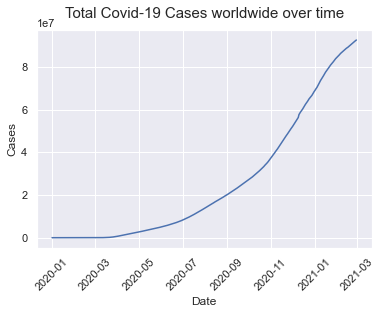

In [90]:
c_vs_t = sns.lineplot(data = cases_vs_time, x = 'Date', y = 'Cases')
plt.xticks(rotation=45)
plt.title("Total Covid-19 Cases worldwide over time", fontsize=15, pad=12)

In [91]:
deaths_vs_time = (df1
                .filter(['Date','Deaths'])
                .groupby('Date')
                .agg('sum')
                .reset_index())
deaths_vs_time

,Date,Deaths
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
420,2021-02-24,2015994
421,2021-02-25,2023612
422,2021-02-26,2030685
423,2021-02-27,2036669


Text(0.5, 1.0, 'Total Covid-19 Deaths worldwide over time')

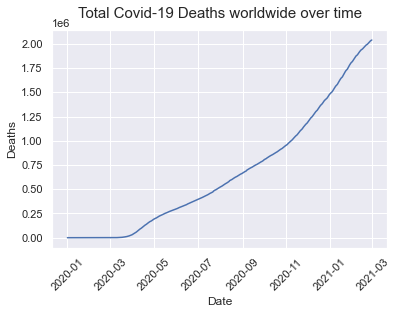

In [92]:
d_vs_t = sns.lineplot(data = deaths_vs_time, x = 'Date', y = 'Deaths')
plt.xticks(rotation=45)
plt.title("Total Covid-19 Deaths worldwide over time", fontsize=15, pad=12)

## Plot 3: Total Cases/Deaths by Continent over time

In [93]:
cases_vs_continent = (df1
                     .filter(['Date','Continent','Cases'])
                     .groupby(['Date','Continent'])
                     .agg('sum')
                     .reset_index())
cases_vs_continent

,Date,Continent,Cases
0,2020-01-01,North America,0
1,2020-01-01,South America,0
2,2020-01-02,North America,0
3,2020-01-02,South America,0
4,2020-01-03,North America,0
...,...,...,...
2425,2021-02-28,Asia,27548683
2426,2021-02-28,Europe,21807692
2427,2021-02-28,North America,32664337
2428,2021-02-28,Oceania,31415


<AxesSubplot:title={'center':'Total Cases by Continents over time'}, xlabel='Date', ylabel='Cases'>

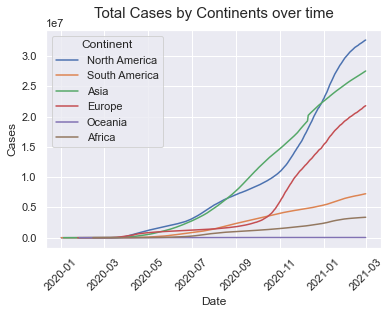

In [94]:
c_vs_conti = sns.lineplot(data = cases_vs_continent, x = 'Date', y = 'Cases', hue = 'Continent')
plt.xticks(rotation=45)
plt.title("Total Cases by Continents over time", fontsize=15, pad=12)
c_vs_conti


In [133]:
deaths_vs_continent = (df1
                     .filter(['Date','Continent','Deaths'])
                     .groupby(['Date','Continent'])
                     .agg('sum')
                     .reset_index())
deaths_vs_continent

,Date,Continent,Deaths
0,2020-01-01,North America,0
1,2020-01-01,South America,0
2,2020-01-02,North America,0
3,2020-01-02,South America,0
4,2020-01-03,North America,0
...,...,...,...
2425,2021-02-28,Asia,455565
2426,2021-02-28,Europe,547199
2427,2021-02-28,North America,741671
2428,2021-02-28,Oceania,937


<AxesSubplot:title={'center':'Total Deaths by Continents over time'}, xlabel='Date', ylabel='Deaths'>

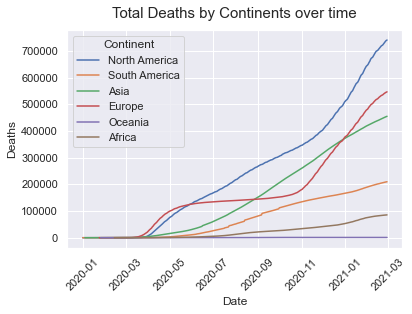

In [96]:
d_vs_conti = sns.lineplot(data = deaths_vs_continent, x = 'Date', y = 'Deaths', hue = 'Continent')
plt.xticks(rotation=45)
plt.title("Total Deaths by Continents over time", fontsize=15, pad=12)
d_vs_conti


## Normalisation of Features in Dataset

In [97]:
df_col_list = list(df.columns)
df_col_list

['Entity',
 'Continent',
 'Latitude',
 'Longitude',
 'Average temperature per year',
 'Hospital beds per 1000 people',
 'Medical doctors per 1000 people',
 'GDP/Capita',
 'Population',
 'Median age',
 'Population aged 65 and over (%)',
 'Date',
 'Daily tests',
 'Cases',
 'Deaths']

In [98]:
tmp = df1.copy()
filter_list = [x for x in df_col_list if x != 'Date' and x != 'Daily tests']
grp_by = [y for y in filter_list if y != 'Cases' and y !='Deaths']
              
tmp1 = (tmp
       .filter(filter_list)
       .groupby(grp_by)
       .agg('sum')
       .reset_index())
tmp1

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,8426482,171892
1,Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6,16892357,547843
2,Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11,260382731,6622663
3,Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11,24370297,428678
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16,6789426,186575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,United States,North America,37.09,-95.71,11,2.77,2.57,65297.5,325719178,38,16,3228496695,73071478
100,Uruguay,South America,-32.52,-55.77,16,2.80,3.74,16190.1,3456750,35,15,3106163,36814
101,Vietnam,Asia,14.06,108.28,25,2.60,0.82,2715.3,95540800,32,7,329208,6973
102,Zambia,Africa,-13.13,27.85,21,2.00,0.09,1305.1,17094130,17,2,5469924,96458


In [99]:
new_col_names = ['Country', 'Continent', 'Latitude', 'Longitude',
       'Avg Temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)', 'Total Cases', 'Total Deaths']
df_to_norm = tmp1.copy()
df_to_norm.set_axis(new_col_names, axis='columns', inplace=True)
df_to_norm

,Country,Continent,Latitude,Longitude,Avg Temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Total Cases,Total Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,8426482,171892
1,Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6,16892357,547843
2,Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11,260382731,6622663
3,Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11,24370297,428678
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16,6789426,186575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,United States,North America,37.09,-95.71,11,2.77,2.57,65297.5,325719178,38,16,3228496695,73071478
100,Uruguay,South America,-32.52,-55.77,16,2.80,3.74,16190.1,3456750,35,15,3106163,36814
101,Vietnam,Asia,14.06,108.28,25,2.60,0.82,2715.3,95540800,32,7,329208,6973
102,Zambia,Africa,-13.13,27.85,21,2.00,0.09,1305.1,17094130,17,2,5469924,96458


In [100]:
df_norm = preprocessing.normalize(df_to_norm.iloc[:,4:])
df_norm = pd.DataFrame(df_norm)
df_norm

,0,1,2,3,4,5,6,7,8
0,1.572221e-06,3.245513e-07,1.448689e-07,0.000601,0.322693,4.267457e-06,1.572221e-06,0.946306,0.019304
1,5.600202e-07,4.256154e-08,4.099348e-08,0.000089,0.925560,6.496235e-07,1.344049e-07,0.378402,0.012272
2,5.298966e-08,1.892488e-08,1.479926e-08,0.000038,0.167565,1.173342e-07,4.163473e-08,0.985542,0.025067
3,4.480725e-07,1.710822e-07,1.140548e-07,0.000188,0.119369,1.425685e-06,4.480725e-07,0.992696,0.017462
4,8.620880e-07,1.504735e-07,1.371504e-07,0.002158,0.963929,1.449875e-06,6.269731e-07,0.266049,0.007311
...,...,...,...,...,...,...,...,...,...
99,3.389091e-09,8.534346e-10,7.918148e-10,0.000020,0.100354,1.170777e-08,4.929586e-09,0.994697,0.022513
100,3.442733e-06,6.024782e-07,8.047388e-07,0.003484,0.743792,7.530978e-06,3.227562e-06,0.668356,0.007921
101,2.616668e-07,2.721334e-08,8.582670e-09,0.000028,0.999994,3.349335e-07,7.326669e-08,0.003446,0.000073
102,1.170032e-06,1.114317e-07,5.014424e-09,0.000073,0.952414,9.471691e-07,1.114317e-07,0.304761,0.005374


In [101]:
norm_col_names = ['Avg temperature per year', 
           'Hospital beds per 1000 people',
           'Medical doctors per 1000 people', 
           'GDP/Capita', 
           'Population',
           'Median age', 
           'Population aged 65 and over (%)', 
           'Total Cases', 
           'Total Deaths']
df_norm.set_axis(norm_col_names, axis='columns', inplace=True)
df_norm

,Avg temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Total Cases,Total Deaths
0,1.572221e-06,3.245513e-07,1.448689e-07,0.000601,0.322693,4.267457e-06,1.572221e-06,0.946306,0.019304
1,5.600202e-07,4.256154e-08,4.099348e-08,0.000089,0.925560,6.496235e-07,1.344049e-07,0.378402,0.012272
2,5.298966e-08,1.892488e-08,1.479926e-08,0.000038,0.167565,1.173342e-07,4.163473e-08,0.985542,0.025067
3,4.480725e-07,1.710822e-07,1.140548e-07,0.000188,0.119369,1.425685e-06,4.480725e-07,0.992696,0.017462
4,8.620880e-07,1.504735e-07,1.371504e-07,0.002158,0.963929,1.449875e-06,6.269731e-07,0.266049,0.007311
...,...,...,...,...,...,...,...,...,...
99,3.389091e-09,8.534346e-10,7.918148e-10,0.000020,0.100354,1.170777e-08,4.929586e-09,0.994697,0.022513
100,3.442733e-06,6.024782e-07,8.047388e-07,0.003484,0.743792,7.530978e-06,3.227562e-06,0.668356,0.007921
101,2.616668e-07,2.721334e-08,8.582670e-09,0.000028,0.999994,3.349335e-07,7.326669e-08,0.003446,0.000073
102,1.170032e-06,1.114317e-07,5.014424e-09,0.000073,0.952414,9.471691e-07,1.114317e-07,0.304761,0.005374


In [102]:
df_final = pd.DataFrame()
df_final['Country'] = df_to_norm['Country']
df_final['Continent'] = df_to_norm['Continent']
df_final['Latitude'] = df_to_norm['Latitude']
df_final['Longitude'] = df_to_norm['Longitude']
df_final = df_final.join(df_norm)
df_final

,Country,Continent,Latitude,Longitude,Avg temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Total Cases,Total Deaths
0,Albania,Europe,41.15,20.17,1.572221e-06,3.245513e-07,1.448689e-07,0.000601,0.322693,4.267457e-06,1.572221e-06,0.946306,0.019304
1,Algeria,Africa,28.03,1.66,5.600202e-07,4.256154e-08,4.099348e-08,0.000089,0.925560,6.496235e-07,1.344049e-07,0.378402,0.012272
2,Argentina,South America,-38.42,-63.62,5.298966e-08,1.892488e-08,1.479926e-08,0.000038,0.167565,1.173342e-07,4.163473e-08,0.985542,0.025067
3,Armenia,Europe,40.07,45.04,4.480725e-07,1.710822e-07,1.140548e-07,0.000188,0.119369,1.425685e-06,4.480725e-07,0.992696,0.017462
4,Australia,Oceania,-25.27,133.78,8.620880e-07,1.504735e-07,1.371504e-07,0.002158,0.963929,1.449875e-06,6.269731e-07,0.266049,0.007311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,United States,North America,37.09,-95.71,3.389091e-09,8.534346e-10,7.918148e-10,0.000020,0.100354,1.170777e-08,4.929586e-09,0.994697,0.022513
100,Uruguay,South America,-32.52,-55.77,3.442733e-06,6.024782e-07,8.047388e-07,0.003484,0.743792,7.530978e-06,3.227562e-06,0.668356,0.007921
101,Vietnam,Asia,14.06,108.28,2.616668e-07,2.721334e-08,8.582670e-09,0.000028,0.999994,3.349335e-07,7.326669e-08,0.003446,0.000073
102,Zambia,Africa,-13.13,27.85,1.170032e-06,1.114317e-07,5.014424e-09,0.000073,0.952414,9.471691e-07,1.114317e-07,0.304761,0.005374


## Plot 4: Pairplot between Features

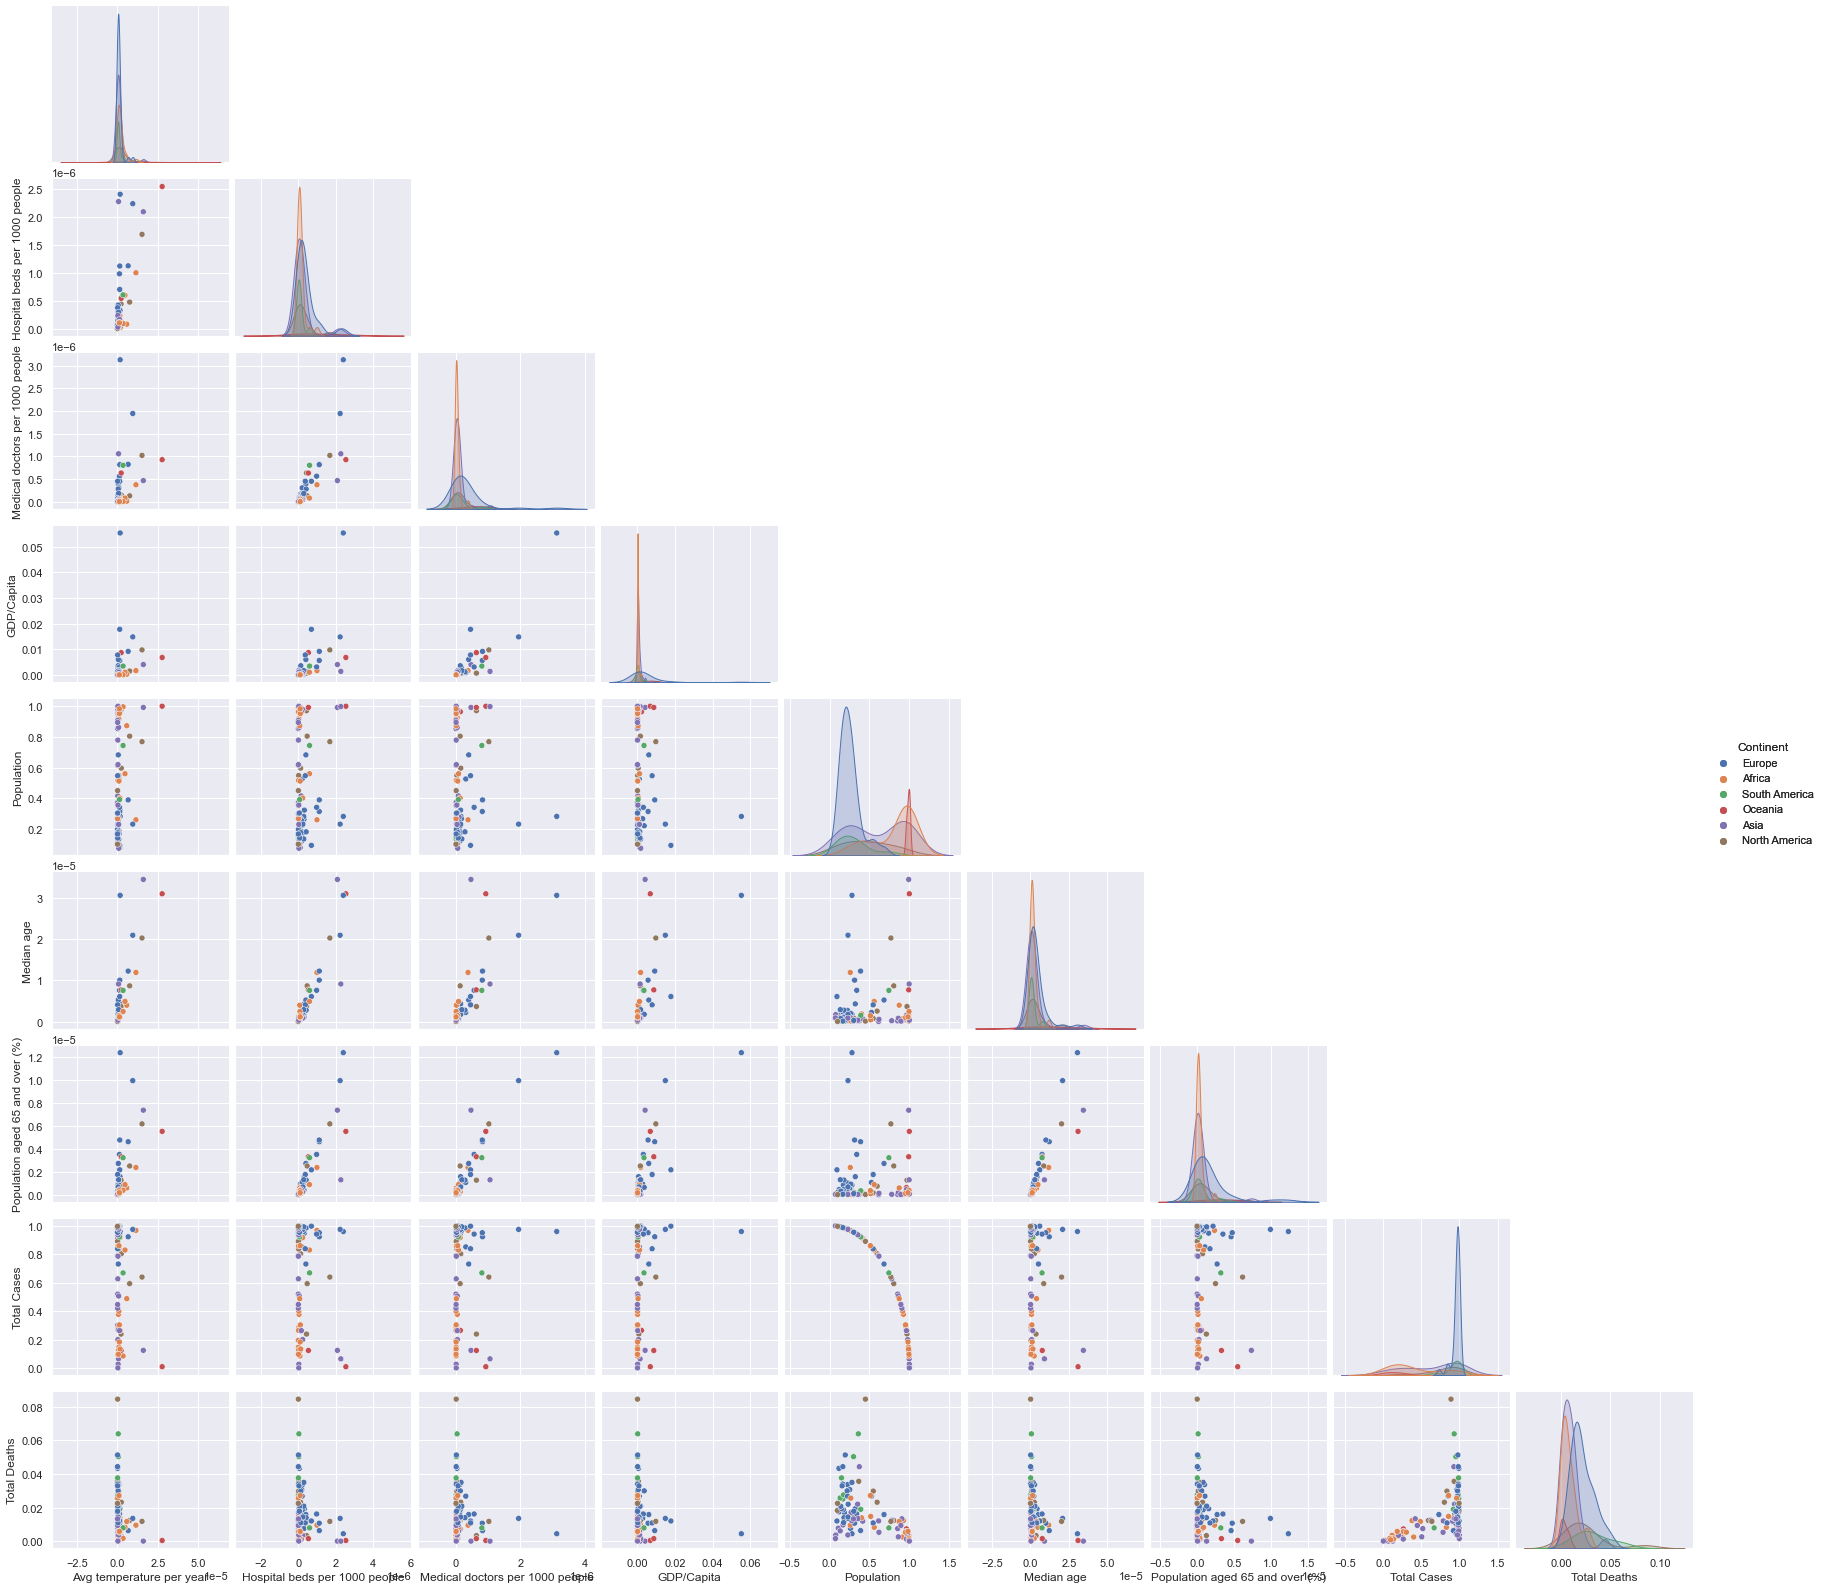

In [103]:
df_pairplot = df_final.copy()
df_pairplot = df_pairplot.drop(columns=['Latitude',
                                       'Longitude'])
sns_plt = sns.pairplot(df_pairplot, hue='Continent', corner=True)
sns_plt.add_legend()


## Exporting to SQLite3 database

In [127]:
import sqlite3

In [128]:
conn = sqlite3.connect('covid-19-database.db')
c = conn.cursor()

In [129]:
c.execute('CREATE TABLE IF NOT EXISTS covid19data (Country text, Continent text, Latitude real, Longitude real, Avg_temperature_per_year real, Hospital_beds_per_1000_people real, Medical_doctors_per_1000_people real, GDP_per_Capita real, Population int,Median_age int, Population_aged_65_and_over real, Total_Cases int, Total_Deaths int)')
conn.commit()

In [130]:
df_final.to_sql('covid19data', conn, if_exists='replace', index = False)

104

In [131]:
col_sql = ['Country', 'Continent', 'Latitude', 'Longitude', 'Avg_temperature_per_year', 'Hospital_beds_per_1000_people', 'Medical_doctors_per_1000_people', 'GDP_per_Capita', 'Population', 'Median_age', 'Population_aged_65_and_over', 'Total_Cases', 'Total_Deaths']
df_sql = pd.DataFrame(c.fetchall(), columns=col_sql)
df_sql

,Country,Continent,Latitude,Longitude,Avg_temperature_per_year,Hospital_beds_per_1000_people,Medical_doctors_per_1000_people,GDP_per_Capita,Population,Median_age,Population_aged_65_and_over,Total_Cases,Total_Deaths


In [132]:
conn.close()